# Mukul Sharma          Task 2: Credit Card Fraud Detection

# Importing the necessary libraries

In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset 

In [46]:
F_train = pd.read_csv("fraudTrain.csv")
F_test = pd.read_csv("fraudTest.csv")

df = pd.concat([F_train, F_test])
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [48]:
df.shape

(1852394, 23)

In [49]:
print(F_train.shape)
print(F_test.shape)

(1296675, 23)
(555719, 23)


In [50]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Checking the null values in the dataset

In [73]:
 print(df.isnull().sum())

Unnamed: 0    0
cc_num        0
merchant      0
category      0
amt           0
gender        0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


# Converting categorical values to numerical using label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
label_encode_cols=['merchant', 'category', 'gender', 'state', 'job']

for col in label_encode_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col] = le
    
    F_train[col]=le.fit_transform(F_train[col])
    label_encoders[col] = le
    
    F_test[col]=le.fit_transform(F_test[col])
    label_encoders[col] = le
    

In [53]:
F_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,499,0,15.56,Erik,Patterson,1,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,215,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,2,1,51.70,Jeffrey,White,1,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,360,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,599,1,105.93,Christopher,Castaneda,1,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,308,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,509,1,74.90,Joseph,Murray,1,42933 Ryan Underpass,...,43.3526,-102.5411,1126,485,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [54]:
F_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,507,5,43.77,Michael,Olson,1,558 Michael Estates,...,40.4931,-91.8912,519,460,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,264,7,111.84,Jose,Vasquez,1,572 Davis Mountains,...,29.0393,-95.4401,28739,198,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,496,7,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,294,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,75,13,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,58,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [55]:
print(F_train.info())
print(F_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  int32  
 4   category               1296675 non-null  int32  
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  int32  
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  int32  
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Dropping the object attributes for further analysis

In [56]:
df.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
F_train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
F_test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
F_train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
F_test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [57]:
print(df.shape)
print(F_train.shape)
print(F_test.shape)

(1852394, 16)
(1296675, 16)
(555719, 16)


In [58]:
print(df.head())

   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  city_pop  job   unix_time  merch_lat  merch_long  \
0  28654  36.0788  -81.1781      3495  372  1325376018  36.011293  -82.048315   
1  99160  48.8878 -118.2105       149  431  1325376044  49.159047 -118.186462   
2  83252  42.1808 -112.2620      4154  308  1325376051  43.150704 -112.154481   
3  59632  46.2306 -112.1138      1939  330  1325376076  47.034331 -112.561071   
4  24433  38.4207  -79.4629        99  116  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2 

In [59]:
print(df.describe())

         Unnamed: 0        cc_num      merchant      category           amt  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  3.429269e+02  6.230569e+00  7.006357e+01   
std    3.669110e+05  1.309115e+18  2.010519e+02  3.913273e+00  1.592540e+02   
min    0.000000e+00  6.041621e+10  0.000000e+00  0.000000e+00  1.000000e+00   
25%    2.315490e+05  1.800429e+14  1.660000e+02  3.000000e+00  9.640000e+00   
50%    4.630980e+05  3.521417e+15  3.460000e+02  6.000000e+00  4.745000e+01   
75%    8.335758e+05  4.642255e+15  5.140000e+02  1.000000e+01  8.310000e+01   
max    1.296674e+06  4.992346e+18  6.920000e+02  1.300000e+01  2.894890e+04   

             gender         state           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.521959e-01  2.666711e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    4.977097e-01  1.432946e+01  2.688185e+04  5.

In [60]:
print(df.isnull().sum())

Unnamed: 0    0
cc_num        0
merchant      0
category      0
amt           0
gender        0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


# Exploratory data analysis(EDA)

# BarPlot to show the data distribution of certain attributes

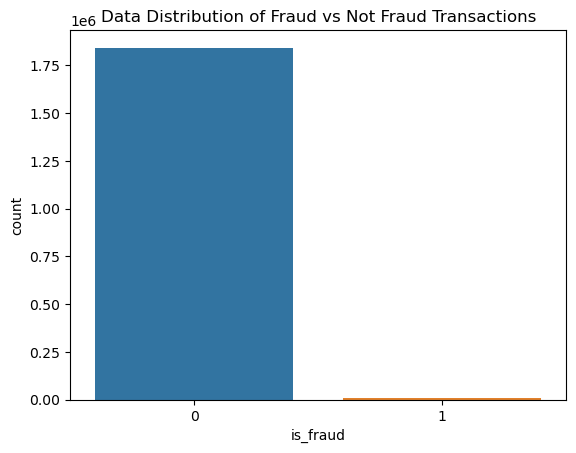

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="is_fraud")
plt.title("Data Distribution of Fraud vs Not Fraud Transactions")
plt.show()

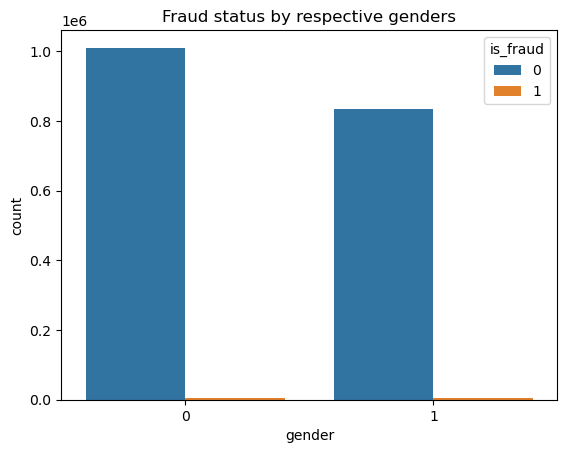

In [62]:
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Fraud status by respective genders')
plt.show()

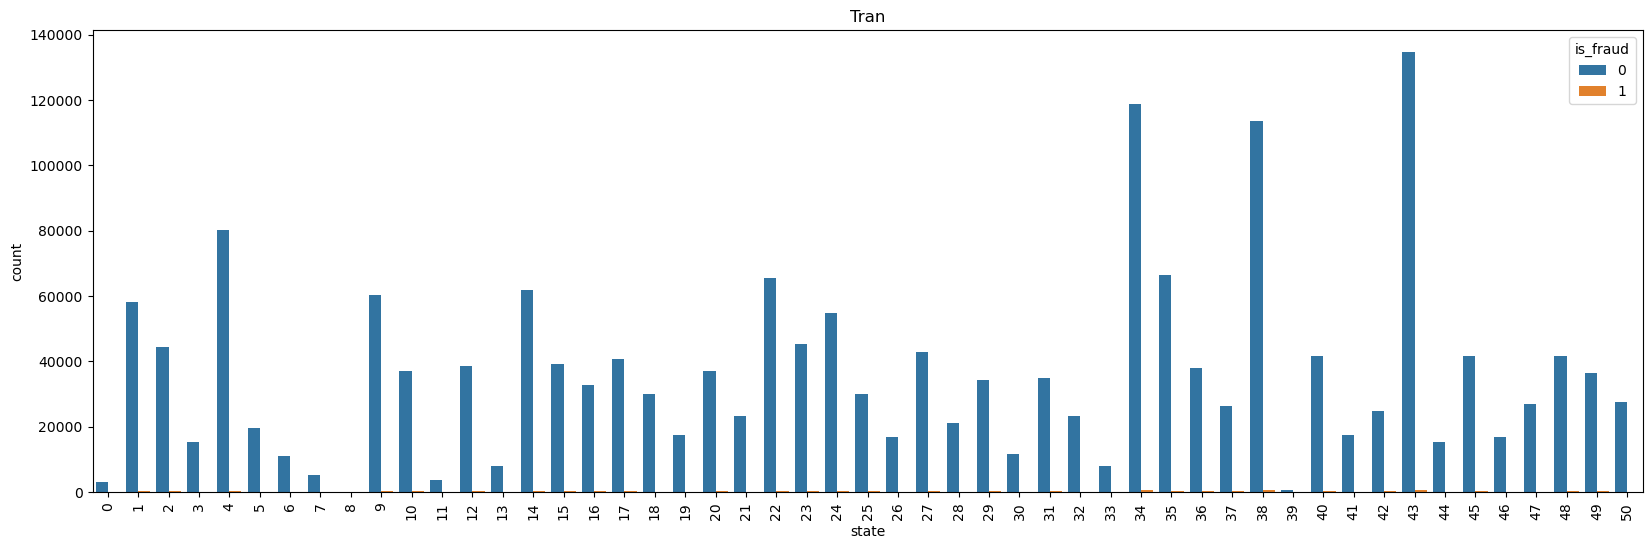

In [63]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='state', hue='is_fraud')
plt.title('Tran')
plt.xticks(rotation=90)
plt.show()

# Heatmap to show the co-relation between attributes

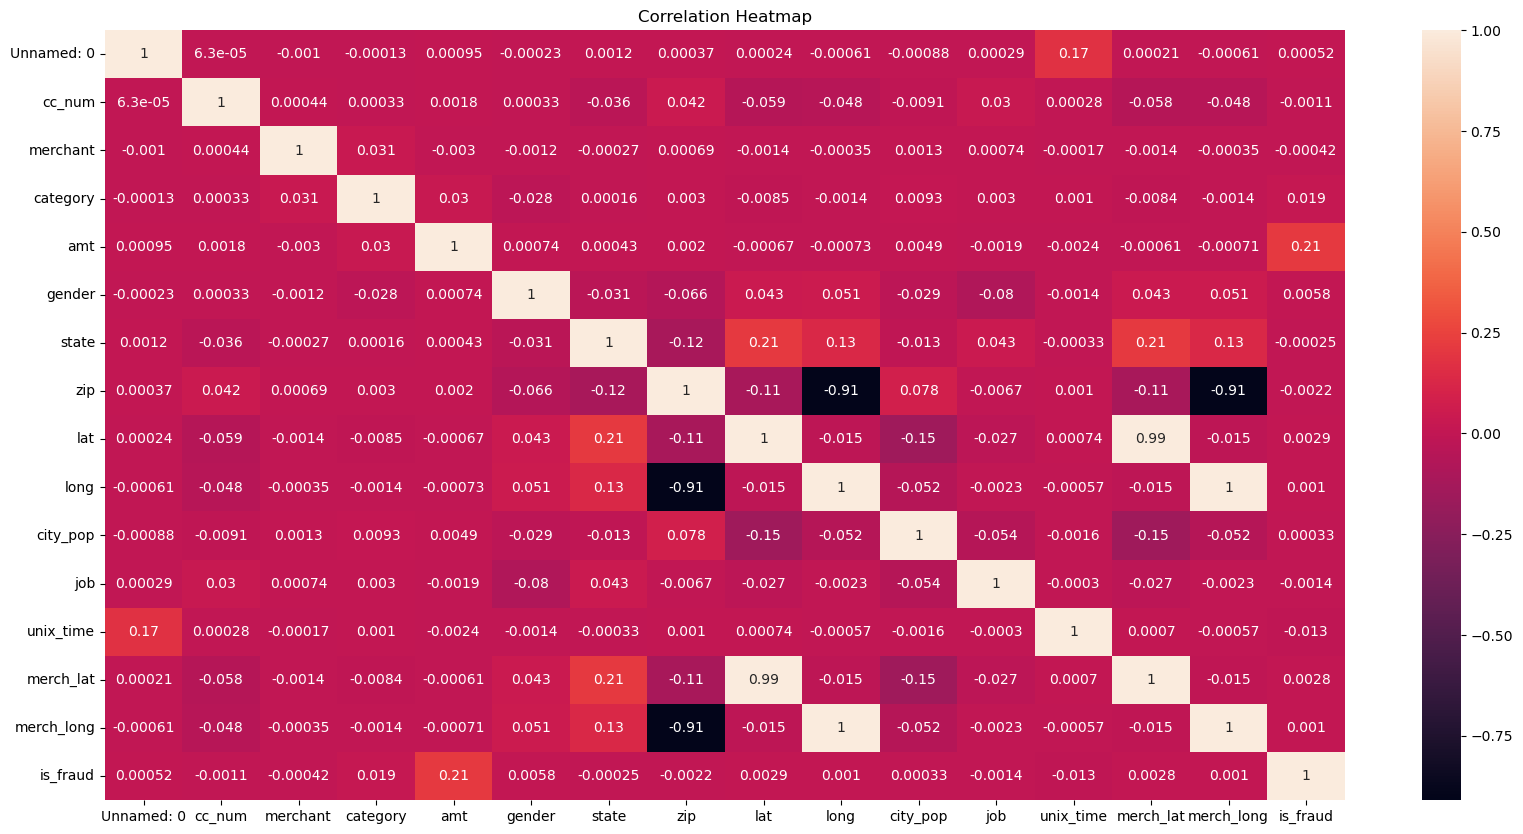

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Model splitting and denoting dependent(y) and independent(x) variables

In [65]:
from sklearn.model_selection import train_test_split
x = df.drop('is_fraud', axis=1)
y = df['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [67]:
log_model.fit(x_train,y_train)
log_model.fit(x_test,y_test)

C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LogisticRegression()

In [68]:
y_pred=log_model.predict(x_test)
y_pred_train=log_model.predict(x_train)

# Calculating the accuracy score, confusion matrix, classification report

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accurace Score",accuracy_score(y_test,y_pred))

C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368526      0]
 [  1953      0]]
Accurace Score 0.9947284461467452


C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree_model= DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

y_pred=tree_model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy_Score",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.62      0.66      0.64      1953

    accuracy                           1.00    370479
   macro avg       0.81      0.83      0.82    370479
weighted avg       1.00      1.00      1.00    370479

[[367744    782]
 [   659   1294]]
Accuracy_Score 0.996110440807711


Hence we conclude the accuracy score after the decision tree model to be 0.996 percent i.e the model is 99.6 percent accurate. We get to know about the percent of fraud as well as not fraud transactions from the above model. 